<a href="https://colab.research.google.com/github/juanibally/ARCHIVOS-DA/blob/main/DataScienceII_primerentrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYECTO DATA SCIENCE II - BALLY JUAN IGNACIO**

En este colab vamos analizar el dataset del FIFA 2023.
Logrando un analisis completo, utilizando distintas galerias.

Responderemos las siguientes preguntas:
¿Cual es el jugador de futbol mas valioso del FIFA2023?

¿La edad influye en la habilidad de un jugador?

¿Los jugadores jovenes son mas caros que los mayores a 30años?

¿Cual es el pais mas valioso según el precio de sus jugadores?

¿Cual es el equipo mas valioso del juego?

¿Que salario tienen los jugadores en promedio?

¿Que posición de jugador tiene la valuacion mas alta?

¿Que edad promedio tienen los jugadores?

¿Los arqueros de 20-23 años son mejores que los de 28-30?

¿Cual es la edad que un jugador promedio esta en su prime futbolistico?


**En este proyecto vamos a utilizar el metodo de regresión. La elección se da porque la variable objetivo (y) que intentamos predecir es continua y numérica. El objetivo de la regresión es predecir un valor numérico basándose en las características de entrada (variables predictoras o X).
Al final vamos a obtener las conclusiones del mejor modelo de predicción**

**Nuestro objetivo será el de predecir la variable Value(in Euro) a partir del resto de las variables que contiene nuestro dataset**

IMPORTAMOS NUESTRAS GALERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Configuramos el entorno de Python en Google Colab
from google.colab import drive
import os

In [ ]:
drive.mount("/content/drive")
print(os.getcwd())

Mounted at /content/drive
/content


In [ ]:
os.chdir("/content/drive/My Drive/")
print(os.getcwd())

/content/drive/My Drive


In [ ]:
df_fifa23 = pd.read_csv('/content/drive/MyDrive/FIFA23.csv')

**Introducción al Proyecto de Análisis del Dataset FIFA 2023**


El fútbol, como uno de los deportes más populares y seguidos en el mundo, genera una gran cantidad de datos que reflejan el rendimiento de jugadores, equipos y ligas. El dataset de FIFA 2023 ofrece una rica fuente de información sobre diversos aspectos del juego, como las habilidades de los jugadores, sus estadísticas de rendimiento, y las características de los equipos. Este proyecto tiene como objetivo realizar un análisis exhaustivo de este dataset utilizando herramientas avanzadas de Python.

Para abordar este proyecto, emplearemos una combinación de bibliotecas poderosas que nos permitirán manipular, analizar y visualizar los datos de manera efectiva.

Este proyecto no solo se enfocará en la exploración de estadísticas básicas, sino que también investigará patrones ocultos y tendencias significativas en el rendimiento de jugadores y equipos. Nuestro objetivo es proporcionar una visión comprensiva y basada en datos del estado actual del fútbol según el dataset de FIFA 2023, y ofrecer insights que puedan ser útiles para aficionados, analistas y profesionales del deporte.

**UNA VISTA GENERAL A NUESTRO DATASET**

In [ ]:
df_fifa23

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


**CANTIDAD DE FILAS Y COLUMNAS**

In [ ]:
df_fifa23.shape

(18539, 89)

In [ ]:
df_fifa23.head

<bound method NDFrame.head of              Known As           Full Name  Overall  Potential  Value(in Euro)  \
0            L. Messi        Lionel Messi       91         91        54000000   
1          K. Benzema       Karim Benzema       91         91        64000000   
2      R. Lewandowski  Robert Lewandowski       91         91        84000000   
3        K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4           K. Mbappé       Kylian Mbappé       91         95       190500000   
...               ...                 ...      ...        ...             ...   
18534      D. Collins      Darren Collins       47         56          110000   
18535    Yang Dejiang        Dejiang Yang       47         57           90000   
18536       L. Mullan         Liam Mullan       47         67          130000   
18537    D. McCallion    Daithí McCallion       47         61          100000   
18538        N. Rabha         Nabin Rabha       47         50           60000   

      Positions Played Best Position          Nationality  \
0                   RW           CAM            Argentina   
1                CF,ST            CF               France   
2                   ST            ST               Poland   
3               CM,CAM            CM              Belgium   
4                ST,LW            ST               France   
...                ...           ...                  ...   
18534            ST,RM           CAM  Republic of Ireland   
18535              CDM           CDM             China PR   
18536               CM            RM     Northern Ireland   
18537               CB            CB  Republic of Ireland   
18538               LB            LB                India   

                                             Image Link  Age  ...  LM Rating  \
0      https://cdn.sofifa.net/players/158/023/23_60.png   35  ...         91   
1      https://cdn.sofifa.net/players/165/153/23_60.png   34  ...         89   
2      https://cdn.sofifa.net/players/188/545/23_60.png   33  ...         86   
3      https://cdn.sofifa.net/players/192/985/23_60.png   31  ...         91   
4      https://cdn.sofifa.net/players/231/747/23_60.png   23  ...         92   
...                                                 ...  ...  ...        ...   
18534  https://cdn.sofifa.net/players/243/725/23_60.png   21  ...         50   
18535  https://cdn.sofifa.net/players/261/933/23_60.png   17  ...         45   
18536  https://cdn.sofifa.net/players/267/823/23_60.png   18  ...         52   
18537  https://cdn.sofifa.net/players/267/824/23_60.png   17  ...         33   
18538  https://cdn.sofifa.net/players/261/424/23_60.png   25  ...         44   

       CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
0             88         91          67         66          67         62   
1             84         89          67         67          67         63   
2             83         86          67         69          67         64   
3             91         91          82         82          82         78   
4             84         92          70         66          70         66   
...          ...        ...         ...        ...         ...        ...   
18534         44         50          41         38          41         40   
18535         45         45          47         48          47         49   
18536         49         52          46         44          46         46   
18537         33         33          44         42          44         47   
18538         40         44          46         43          46         47   

      CB Rating  RB Rating  GK Rating  
0            53         62         22  
1            58         63         21  
2            63         64         22  
3            72         78         24  
4            57         66         21  
...         ...        ...        ...  
18534        36         40         15  
18535        49         49         15  
18536        42   

**OBSERVO LAS ULTIMAS 5 FILAS**

La cual nos muestra la valuacion minima.

In [ ]:
df_fifa23.tail()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15
18538,N. Rabha,Nabin Rabha,47,50,60000,LB,LB,India,https://cdn.sofifa.net/players/261/424/23_60.png,25,...,44,40,44,46,43,46,47,47,47,19


**¿Qué variables tenemos?**

In [ ]:
#Nombre de los atributos
print(df_fifa23.columns)

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

**IDENTIFICO LOS CEROS EN EL DATA SET**

In [ ]:
zero = df_fifa23 == 0
zero.sum()

,0
Known As,0
Full Name,0
Overall,0
Potential,0
Value(in Euro),104
...,...
RWB Rating,0
LB Rating,0
CB Rating,0
RB Rating,0


In [ ]:
df_fifa23.info

<bound method DataFrame.info of              Known As           Full Name  Overall  Potential  Value(in Euro)  \
0            L. Messi        Lionel Messi       91         91        54000000   
1          K. Benzema       Karim Benzema       91         91        64000000   
2      R. Lewandowski  Robert Lewandowski       91         91        84000000   
3        K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4           K. Mbappé       Kylian Mbappé       91         95       190500000   
...               ...                 ...      ...        ...             ...   
18534      D. Collins      Darren Collins       47         56          110000   
18535    Yang Dejiang        Dejiang Yang       47         57           90000   
18536       L. Mullan         Liam Mullan       47         67          130000   
18537    D. McCallion    Daithí McCallion       47         61          100000   
18538        N. Rabha         Nabin Rabha       47         50           60000   

      Positions Played Best Position          Nationality  \
0                   RW           CAM            Argentina   
1                CF,ST            CF               France   
2                   ST            ST               Poland   
3               CM,CAM            CM              Belgium   
4                ST,LW            ST               France   
...                ...           ...                  ...   
18534            ST,RM           CAM  Republic of Ireland   
18535              CDM           CDM             China PR   
18536               CM            RM     Northern Ireland   
18537               CB            CB  Republic of Ireland   
18538               LB            LB                India   

                                             Image Link  Age  ...  LM Rating  \
0      https://cdn.sofifa.net/players/158/023/23_60.png   35  ...         91   
1      https://cdn.sofifa.net/players/165/153/23_60.png   34  ...         89   
2      https://cdn.sofifa.net/players/188/545/23_60.png   33  ...         86   
3      https://cdn.sofifa.net/players/192/985/23_60.png   31  ...         91   
4      https://cdn.sofifa.net/players/231/747/23_60.png   23  ...         92   
...                                                 ...  ...  ...        ...   
18534  https://cdn.sofifa.net/players/243/725/23_60.png   21  ...         50   
18535  https://cdn.sofifa.net/players/261/933/23_60.png   17  ...         45   
18536  https://cdn.sofifa.net/players/267/823/23_60.png   18  ...         52   
18537  https://cdn.sofifa.net/players/267/824/23_60.png   17  ...         33   
18538  https://cdn.sofifa.net/players/261/424/23_60.png   25  ...         44   

       CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
0             88         91          67         66          67         62   
1             84         89          67         67          67         63   
2             83         86          67         69          67         64   
3             91         91          82         82          82         78   
4             84         92          70         66          70         66   
...          ...        ...         ...        ...         ...        ...   
18534         44         50          41         38          41         40   
18535         45         45          47         48          47         49   
18536         49         52          46         44          46         46   
18537         33         33          44         42          44         47   
18538         40         44          46         43          46         47   

      CB Rating  RB Rating  GK Rating  
0            53         62         22  
1            58         63         21  
2            63         64         22  
3            72         78         24  
4            57         66         21  
...         ...        ...        ...  
18534        36         40         15  
18535        49         49         15  
18536        42 

In [ ]:
#Tipo de dato para cada columna
df_fifa23.dtypes

,0
Known As,object
Full Name,object
Overall,int64
Potential,int64
Value(in Euro),int64
...,...
RWB Rating,int64
LB Rating,int64
CB Rating,int64
RB Rating,int64


**PARA VISUALIZAR LOS DATOS NULOS**

In [ ]:
pip install missingno

In [ ]:
import missingno as msno

<Axes: >

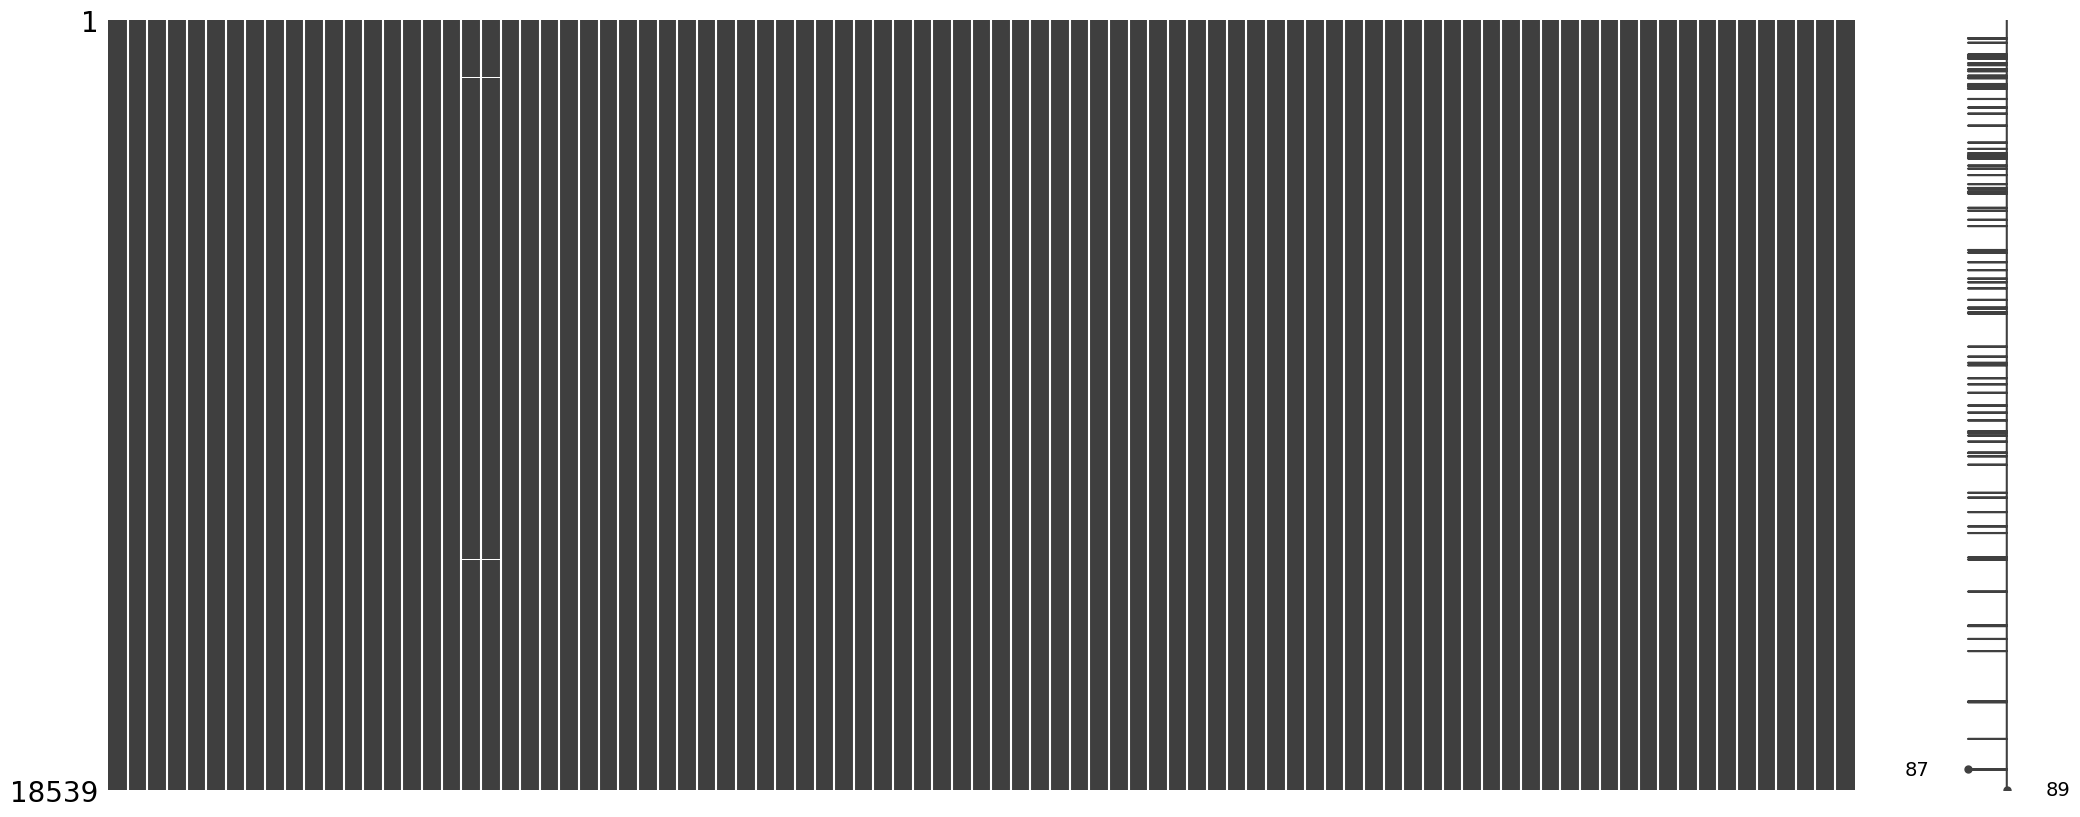

In [ ]:
# Grafico de matriz de valores faltantes
msno.matrix(df_fifa23)

<Axes: >

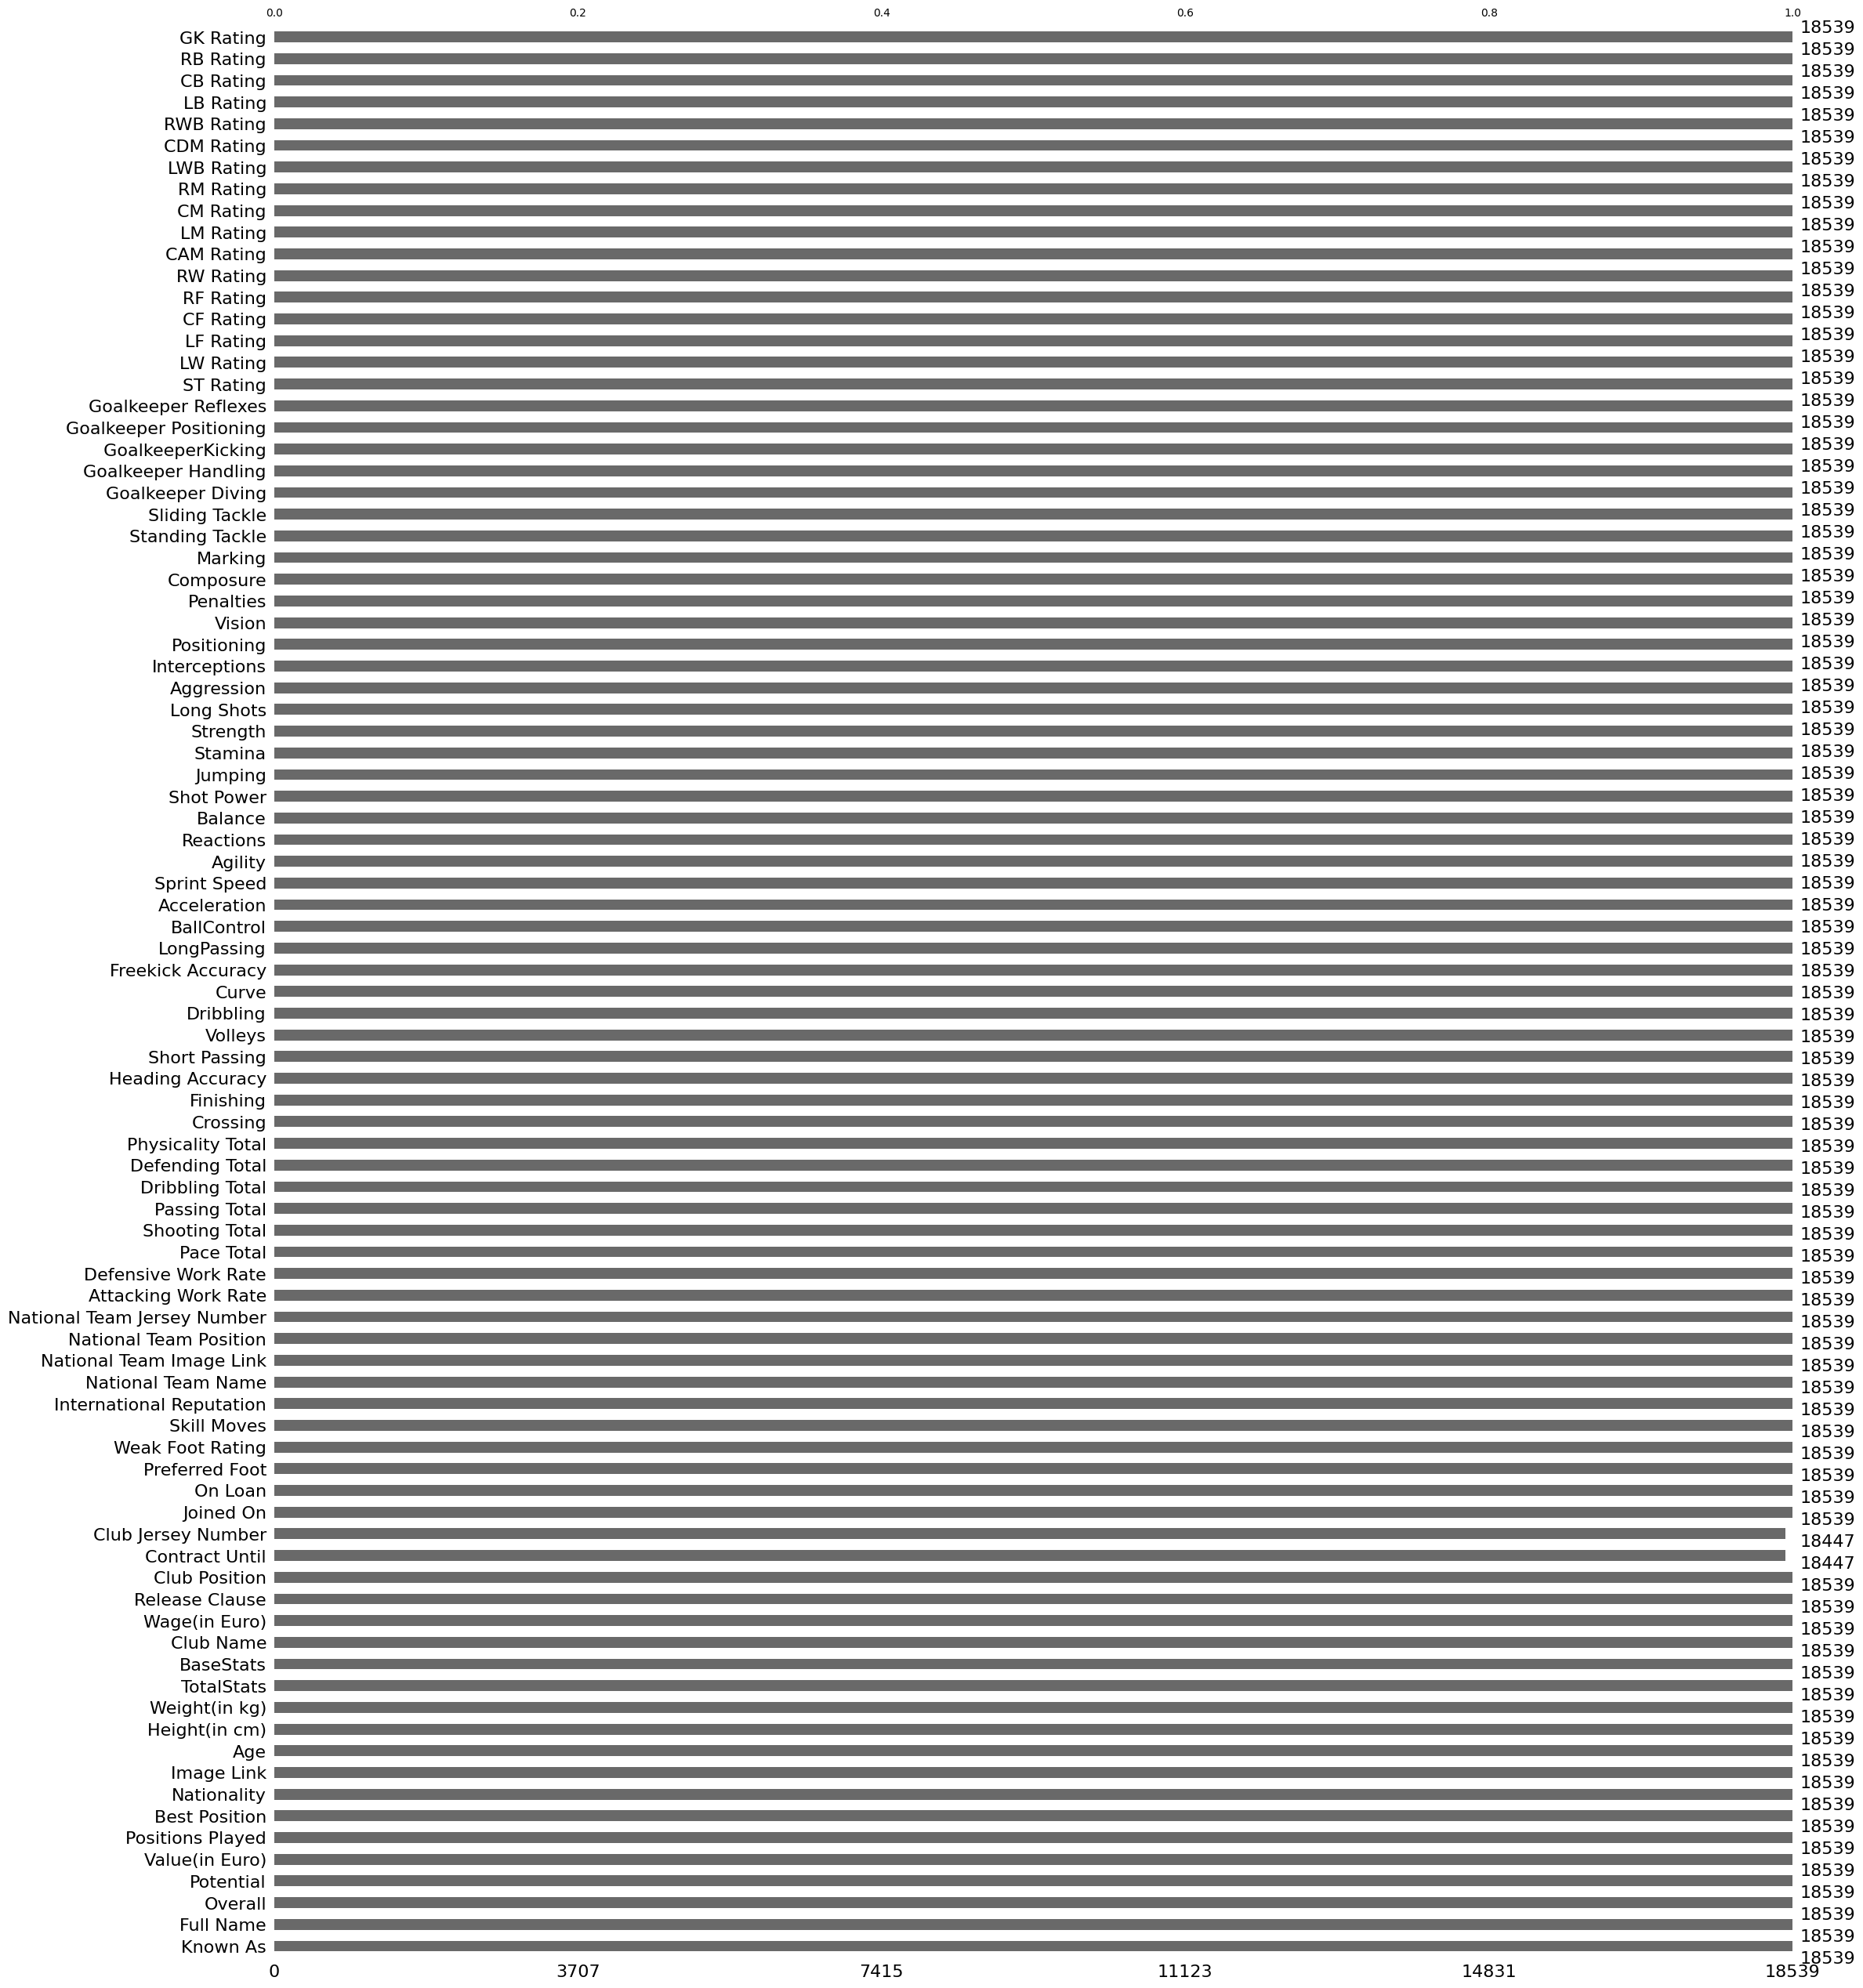

In [ ]:
# Gráfico de barras de valores faltantes por columna
msno.bar(df_fifa23)

Podemos ver que nuestro data set, contiene muy pocos valores nulos. Lo cual favorece nuestro trabajo y podemos realizar mejores predicciones.

**Verificamos datos duplicados**

In [ ]:
print(df_fifa23.shape)
df= df_fifa23.drop_duplicates()
print(df_fifa23.shape)

(18539, 89)
(18539, 89)


**UTILIZAMOS EL METODO GROUPBY**

In [ ]:
# Agrupar por 'Nacionalidad' y sumar las 'Valuaciones'
df_fifa23.groupby('Nationality')['Value(in Euro)'].sum()

,Value(in Euro)
Nationality,
Afghanistan,1100000
Albania,150190000
Algeria,287714999
Andorra,850000
Angola,50349999
...,...
Venezuela,216130000
Vietnam,1200000
Wales,248410000


Podemos observar la valuacion en euros de cada pais.

In [ ]:
# Agrupar por 'Equipos' y sumar las 'Valuaciones'
df_fifa23.groupby('Club Name')['Value(in Euro)'].sum()

,Value(in Euro)
Club Name,
1. FC Heidenheim 1846,36650000
1. FC Kaiserslautern,29905000
1. FC Köln,126535000
1. FC Magdeburg,32450000
1. FC Nürnberg,37850000
...,...
Ümraniyespor,23240000
İstanbul Başakşehir FK,64325000
İstanbulspor,14975000


Valuación en euros de los paises.

In [ ]:
df_fifa23.groupby('Nationality')['Value(in Euro)'].sum().sort_values(ascending=False)


,Value(in Euro)
Nationality,
Spain,5184394999
France,4630494998
England,4279005000
Brazil,4272774989
Germany,3482149998
...,...
South Sudan,330000
Singapore,300000
Guam,180000


El pais con mayor valuación en euros en el FIFA 2023 es España, en segundo lugar Francia y completa el podio en tercer lugar Inglaterra.

**Valuacion en Euros de los equipos**

In [ ]:
df_fifa23.groupby('Club Name')['Value(in Euro)'].sum().sort_values(ascending=False)

,Value(in Euro)
Club Name,
Manchester City,1248655000
Liverpool,1098825000
Paris Saint-Germain,1051375000
Real Madrid CF,1035625000
FC Barcelona,1013125000
...,...
Hebei FC,4540000
UCD AFC,4535000
Drogheda United,4455000


El equipo con mas valioso es el Manchester City **1.248.655.000 Euros.**

En segundo lugar se ubica el Liverpool **1.098.825.000 Euros**

En tercer lugar el Paris Saint-Germain  **1.051.375.000 Euros**

In [ ]:
top_5_clubs = df_fifa23.groupby('Club Name')['Value(in Euro)'].sum().sort_values(ascending=False).head(5)
print(top_5_clubs)

Club Name
Manchester City        1248655000
Liverpool              1098825000
Paris Saint-Germain    1051375000
Real Madrid CF         1035625000
FC Barcelona           1013125000
Name: Value(in Euro), dtype: int64


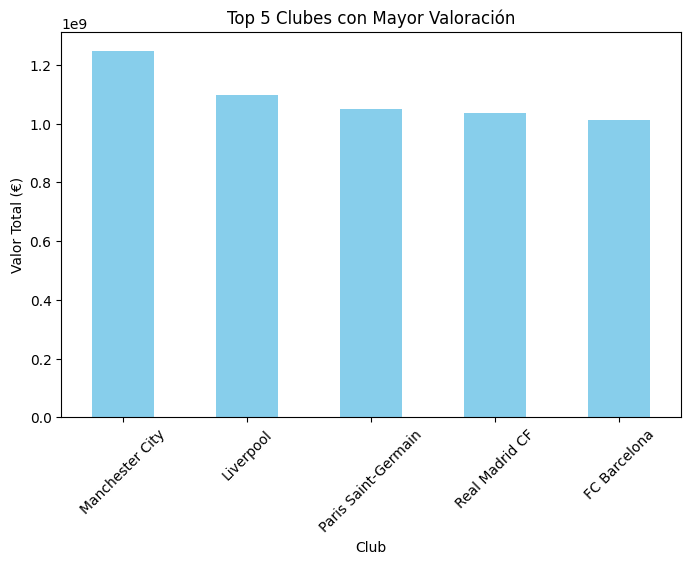

In [ ]:
top_5_clubs.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.ylabel("Valor Total (€)")
plt.xlabel("Club")
plt.title("Top 5 Clubes con Mayor Valoración")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Agrupar por 'Equipo','Posición', 'edad', 'Agilidad' y sumar los 'Valuaciones'
df_fifa23.groupby(['Full Name', 'Nationality', 'Club Name', 'Best Position', 'Age', 'Overall', 'Agility'])['Value(in Euro)'].sum().sort_values(ascending=False)

,,,,,,,Value(in Euro)
Full Name,Nationality,Club Name,Best Position,Age,Overall,Agility,
Kylian Mbappé,France,Paris Saint-Germain,ST,23,91,93,190500000
Erling Haaland,Norway,Manchester City,ST,21,88,76,148000000
Frenkie de Jong,Netherlands,FC Barcelona,CM,25,87,87,116500000
Pedro González López,Spain,FC Barcelona,CM,19,85,88,116000000
Mohamed Salah,Egypt,Liverpool,RW,30,90,90,115500000
...,...,...,...,...,...,...,...
Roy Kent,England,AFC Richmond,CDM,40,83,63,0
Homam Ahmed,Qatar,Free agent,LWB,22,68,59,0
César Montes,Mexico,Free agent,CB,25,77,75,0


**Podemos ver que el jugador mas valioso del mundo es el Frances Kylian Mbappé, jugador del Paris Saint-Germaint. Su posicion es ST 'centro delantero'. Tiene 23 años, un overall de 91 y una agilidad de 93. Su Valuacion es 190.500.000 euros.**

**Planteamos un describe para tener un paneo general estadistico de nuestro data set**

Podemos observar la Media, desvio estandar, minimos, maximos y los cuartiles.

In [ ]:
df_fifa23.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


Conclusión:
Edad: El promedio de los jugadores es de 25 años. El jugador mas joven tiene 16 años y el mayor 44.
Salario: El salario promedio de los jugadores de futbol es de 8868 euros. El jugador que menos cobra 500 euros y el que mas 450.000 euros.
El overall en promedio es de 65 en la totalidad de jugadores del FIFA23.

In [ ]:
x = df_fifa23['Age']  # Define la variable X
y = df_fifa23['Overall']  # Define la variable Y
y

,Overall
0,91
1,91
2,91
3,91
4,91
...,...
18534,47
18535,47
18536,47
18537,47


**Utilizo Seaborn para mejores graficos**

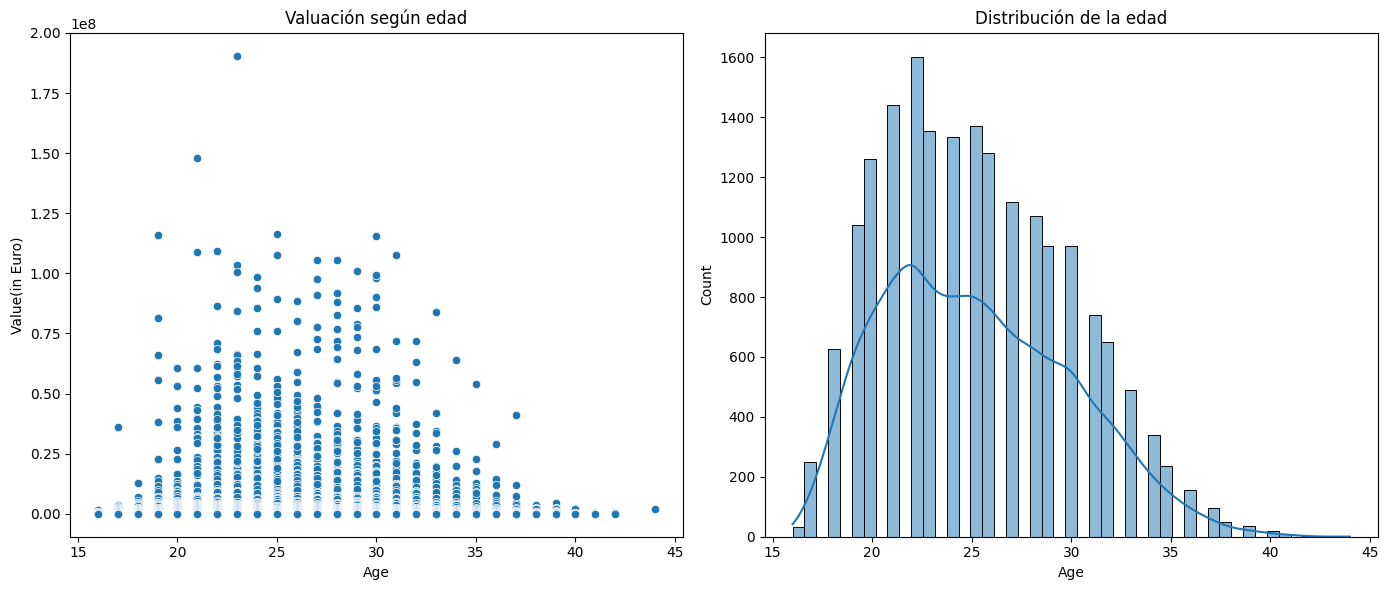

In [ ]:
# Crear una figura y ejes con Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Graficar en el primer eje
sns.scatterplot(data=df_fifa23, x='Age', y='Value(in Euro)', ax=ax[0])
ax[0].set_title('Valuación según edad')

# Graficar en el segundo eje
sns.histplot(data=df_fifa23, x='Age', kde=True, ax=ax[1])
ax[1].set_title('Distribución de la edad')

plt.tight_layout()
plt.show()

**CONCLUSIÖN**

Los jugadores mas valiosos en promedio se encuentran en el rango de edad (21-25años) .

La mayor cantidad de jugadores tienen 23 y 24 años.

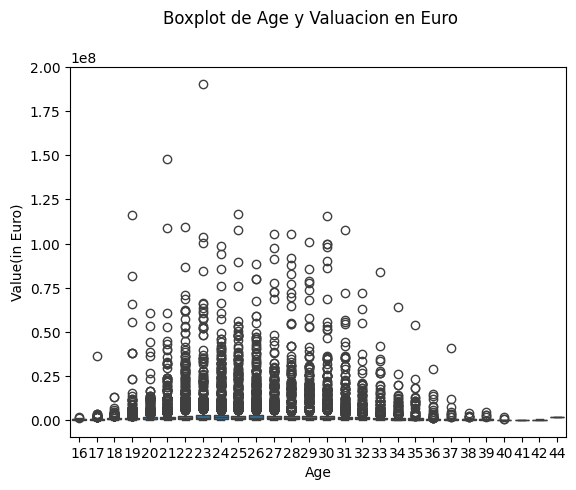

In [ ]:
# Crear un Boxplot
sns.boxplot(data=df_fifa23, x='Age', y='Value(in Euro)')
plt.suptitle('Boxplot de Age y Valuacion en Euro', y=1)
plt.show()

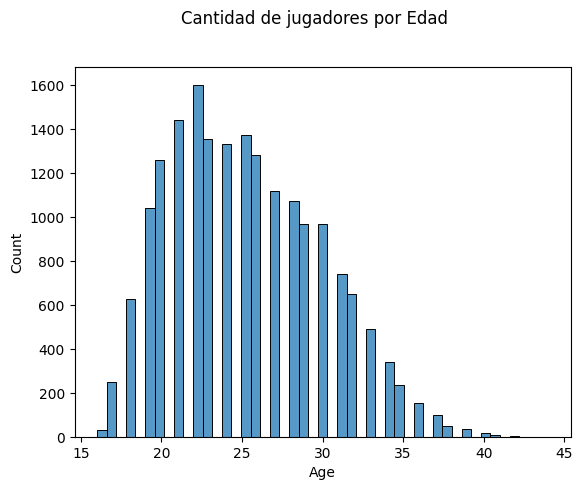

In [ ]:
sns.histplot(data=df_fifa23, x="Age")
plt.suptitle('Cantidad de jugadores por Edad', y=1)
plt.show()

**Vemos que la mayoria de los jugadores se encuentran entre los 21 y los 25 años.**

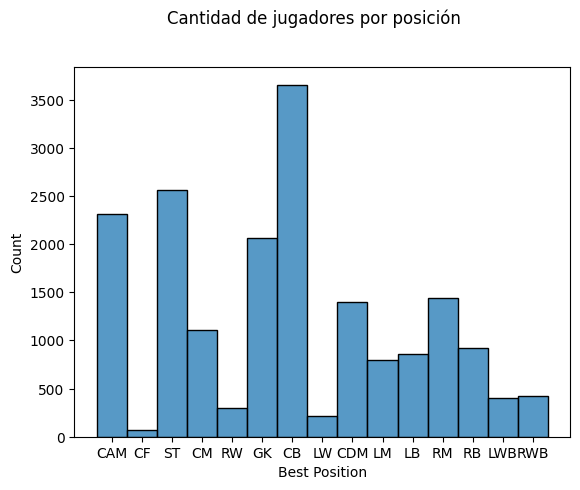

In [ ]:
sns.histplot(data=df_fifa23, x="Best Position")
plt.suptitle('Cantidad de jugadores por posición', y=1)
plt.show()

**La posicion que mas jugadores hay es CB ¨defensa central¨**

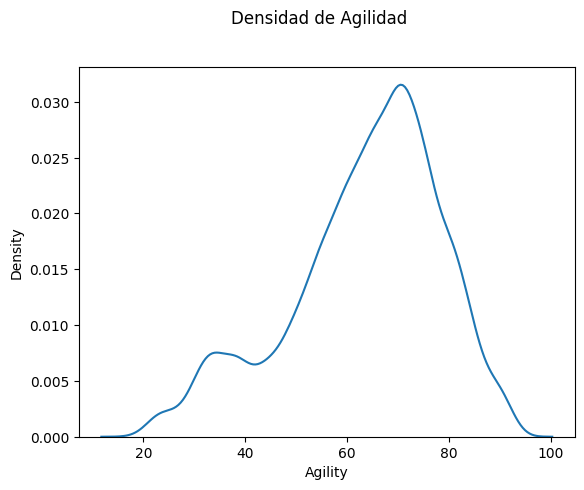

In [ ]:
sns.kdeplot(data=df_fifa23, x="Agility")
plt.suptitle('Densidad de Agilidad', y=1)
plt.show()

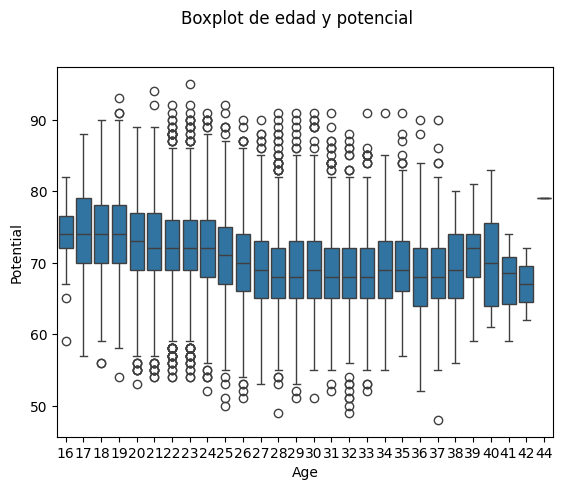

In [ ]:
sns.boxplot(data=df_fifa23, x="Age", y="Potential")
plt.suptitle('Boxplot de edad y potencial', y=1)
plt.show()

**Creo un Boxplot para visualizar outlier entre el potencial de los jugadores con respecto a su edad.**

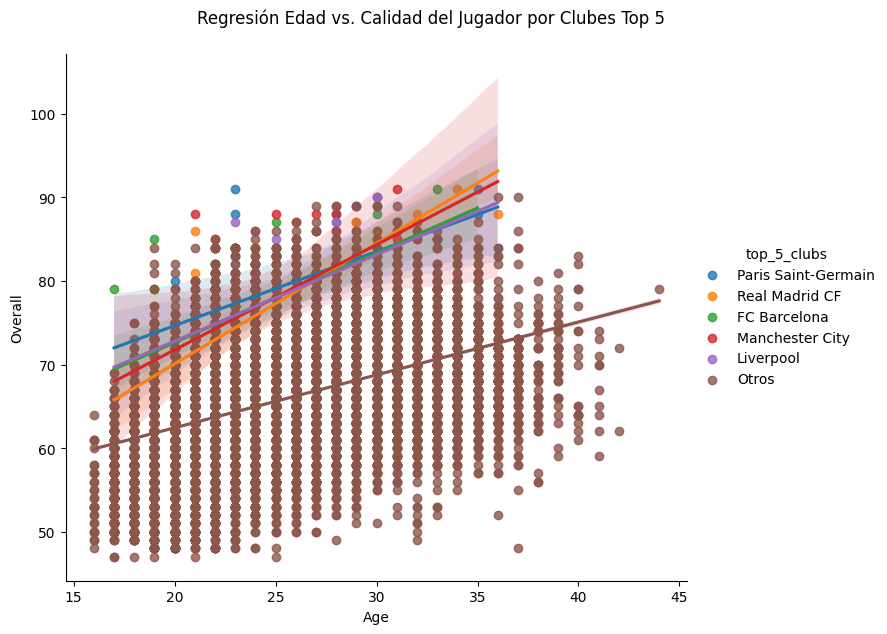

In [ ]:
# Obtener los Top 5 clubes por valor total
top_5_clubs = df_fifa23.groupby('Club Name')['Value(in Euro)'].sum().nlargest(5).index

# Crear una columna indicando si el jugador pertenece a un Top 5 club
df_fifa23["top_5_clubs"] = df_fifa23["Club Name"].apply(lambda x: x if x in top_5_clubs else "Otros")

# Gráfico de regresión con diferenciación por clubes top 5
sns.lmplot(data=df_fifa23, x="Age", y="Overall", hue="top_5_clubs", height=6, aspect=1.2)
plt.suptitle('Regresión Edad vs. Calidad del Jugador por Clubes Top 5', y=1.05)
plt.show()

El top 5 de clubes por su valuación tienen un Overall superior al resto de los equipos. El rango de edad de sus jugadores comienza en 17 y el jugador con mayor edad tiene 36 años.
El valor mas alto lo tiene el PSG y es Kylian Mbappe.
Se ve una correlacion positiva del Overall y la edad de los player.

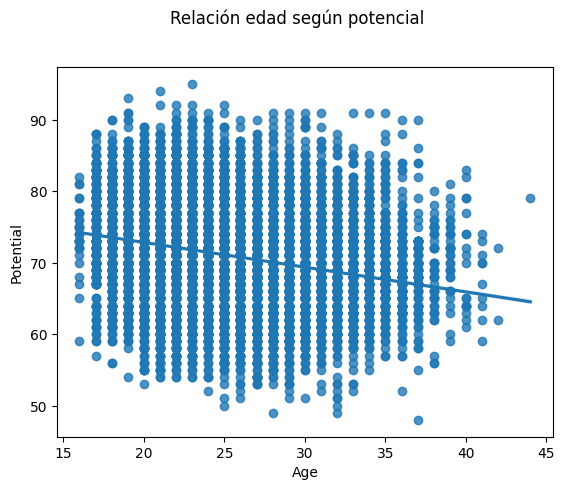

In [ ]:
sns.regplot(data=df_fifa23, x="Age", y="Potential")
plt.suptitle('Relación edad según potencial', y=1)
plt.show()

Se ve claramente como la regresión lineal, nos muestra que a medida que los jugadores son mayores van perdiendo potencial.
Asi como tambien se observa una gran dispersión de los datos entre su edad y potencial.

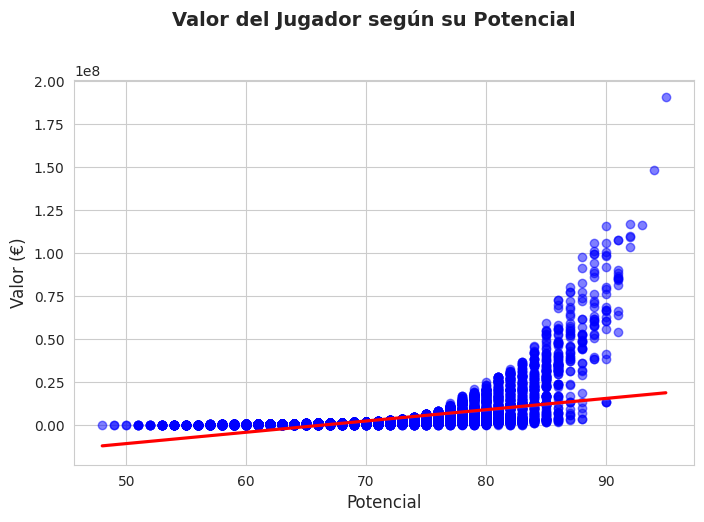

In [ ]:
# Configuración del estilo
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico de regresión mejorado
sns.regplot(
    data=df_fifa23,
    x="Potential",
    y="Value(in Euro)",
    scatter_kws={'alpha': 0.5, 'color': 'blue'},  # Transparencia y color de los puntos
    line_kws={'color': 'red'},  # Color de la línea de regresión
    truncate=True  # Evita que la línea de regresión se extienda demasiado
)

# Título y etiquetas
plt.suptitle("Valor del Jugador según su Potencial", fontsize=14, fontweight='bold', y=1.02)
plt.xlabel("Potencial", fontsize=12)
plt.ylabel("Valor (€)", fontsize=12)

# Mostrar gráfico
plt.show()

Observamos que una regresion lineal no se ajusta muy bien a nuestros datos, pero se ve una clara tendencia a que los jugadores con mayor potencial son mas caros. Por lo que los jugadores jovenes tienden a ser mas valiosos a la hora de realizar una venta o compra.

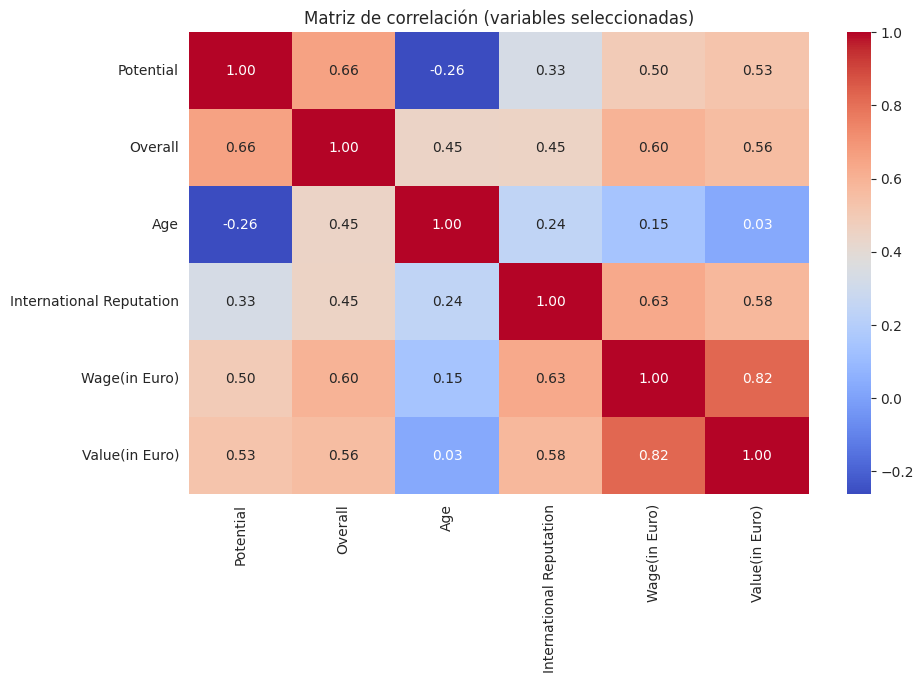

In [ ]:
# Definir las columnas que queremos analizar
selected_columns = ["Potential", "Overall", "Age", "International Reputation", "Wage(in Euro)", "Value(in Euro)"]

# Calcular la correlación solo con estas columnas
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (variables seleccionadas)")
plt.show()